In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sn
import re

import tensorflow as tf 
import tensorflow.keras as keras 

# Loking in the data
first step in find the best solution
is to search in the data and be familiar with it
all the step we do in this section it to know the data

In [42]:
df=pd.read_csv('/content/drive/MyDrive/Covid_19_tweets_train.csv',encoding='latin')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [44]:
df.groupby('UserName').median()

,ScreenName
UserName,
3799,48751
3800,48752
3801,48753
3802,48754
3803,48755
...,...
44951,89903
44952,89904
44953,89905


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [46]:
mask=df['Location'].isnull() == True 

In [47]:
df[mask]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
14,3813,48765,NaN,16-03-2020,ADARA Releases COVID-19 Resource Center for Tr...,Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive
41151,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive


In [48]:
df[~mask].head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [49]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
SjÃ¦lland, Danmark                1
why?                              1
Birmingham, Birmingham            1
Birmingham EU.                    1
Kitchener | Ontario | Canada      1
Name: Location, Length: 12220, dtype: int64

As we see The Location column has too many bad value and the only column has None value so 
I would delet this column its better than west time to clean This column

In [51]:
df.drop('Location',axis=1,inplace=True)
df

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,3799,48751,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...
41152,44951,89903,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   TweetAt        41157 non-null  object
 3   OriginalTweet  41157 non-null  object
 4   Sentiment      41157 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


 **Find The Number of Class**

In [53]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

as we see we have 5 class in this data 
#### Positive,  Negative, ExtremelyPositive, ExtremelyNegative, Neutral

In [55]:
df['OriginalTweet'].value_counts()

@Consumer_Cell has the worst customer service.  Sold my 77 yo mother a #consumercellular phone that doesn't work then cancelled my account without my authorization.  You should be ashamed of this kind of service during #coronavirus epidemic.                                             1
"YouÂre social distancing, but you still need to eat. @amandamull untangles the physical and moral hazards of ordering takeout or going to the grocery store during a pandemic." https://t.co/ke8c4iKD0j #coronavirus                                                                        1
Can we just take a minute to appreciate the hard work and stress all the panic buyers are putting the supermarket workers under. Never seen so much selfishness in my life. #Corvid19uk #panicbuying #COVID2019 #emptyshelves                                                                 1
@BustingCrimes @grahamwettone Help for hospitality staff: @HospAction \r\r\nHelp for pub staff: @drinks_trust \r\r\nAdvice on benefits, 

## Note
There is no repete tweet and that good thing for traning 

In [57]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [58]:
dic={'Positive':0,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':4}

In [59]:
#make onther column that contain sentiment but in int 
df['NomericSentiment']=df['Sentiment'].apply(lambda x: dic[x])

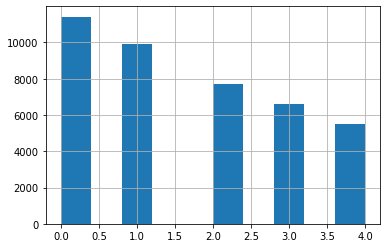

In [60]:
df['NomericSentiment'].hist()

## Note
as we see the data have more positive value than the other class.

in other world we have no normal distribution and the distribution is 

skew in Positive class and that should be take consideration  in the traning

In [62]:
df['OriginalTweet'][:3]

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
Name: OriginalTweet, dtype: object

In [63]:
# find The number of world in each tweet
df['world_count']=df['OriginalTweet'].apply(lambda x: len(x.split()))

In [64]:

df['world_count'].describe()

count    41157.000000
mean        30.500304
std         11.591172
min          1.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: world_count, dtype: float64

 as we see There is some tweet to small so we we can drop this tweet becous its un valid tweet

In [66]:
df[df['world_count']<=3]

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment,NomericSentiment,world_count
7259,11058,56010,19-03-2020,Coronavirus...Better...Netizens...Mockery...Mo...,Extremely Positive,3,2
7260,11059,56011,19-03-2020,US...Impose...New...Iran...Link...Sanctions......,Extremely Positive,3,2
9073,12872,57824,20-03-2020,Stop Fucking Hoarding,Negative,1,3
9163,12962,57914,20-03-2020,Reality check indeed,Neutral,2,3
9167,12966,57918,20-03-2020,Meanwhile at home,Neutral,2,3
9516,13315,58267,20-03-2020,Unintended consequences...\r\r\n\r\r\nhttps://...,Neutral,2,3
9776,13575,58527,20-03-2020,Be like Bob,Positive,0,3
12047,15846,60798,21-03-2020,only in France,Neutral,2,3
12399,16198,61150,21-03-2020,Seems about right,Neutral,2,3
12716,16515,61467,21-03-2020,Stay safe everyone,Positive,0,3


In [67]:
df['OriginalTweet'].iloc[27610]

'Brazil...Health...Official...Confirm...First...Indigenous...Coronavirus...Case...Amazon...Chief...Bezos...Say...Donating...100...Food...Charity...COVID-19...Pandemic...Trump...Campaign...Demand...Jeff...Session...Campaign...End...Delusional...Invoking...Ties...President...Turkey'

### Note
we can see some Tweet have ... spliter or - so we should update the world_count

In [69]:
df['world_count']=df['OriginalTweet'].apply(lambda x:len(x.split()+x.split('-')+x.split('...')))

In [70]:
df['world_count'].describe()

count    41157.000000
mean        32.982992
std         11.705900
min          3.000000
25%         24.000000
50%         34.000000
75%         42.000000
max         67.000000
Name: world_count, dtype: float64

In [71]:
df[df['world_count']<=6]

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment,NomericSentiment,world_count
155,3954,48906,16-03-2020,Cleanshelf supermarket Sanitizers 19,Neutral,2,6
239,4038,48990,16-03-2020,Please read this thread,Positive,0,6
602,4401,49353,16-03-2020,this is kind \r\r\nhttps://t.co/QoXqJDbLiC,Positive,0,6
5506,9305,54257,19-03-2020,the new supermarket wars,Negative,1,6
5709,9508,54460,19-03-2020,brings to its knees,Neutral,2,6
...,...,...,...,...,...,...,...
39290,43089,88041,12-04-2020,Toilet paper,Neutral,2,4
40091,43890,88842,13-04-2020,Interesting article....\r\r\n\r\r\nhttps://t.c...,Positive,0,6
40135,43934,88886,13-04-2020,Interesting aricle 19,Positive,0,5
40893,44692,89644,14-04-2020,Together We Can,Neutral,2,5


In [73]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from nltk.corpus import stopwords

In [76]:
len(stopwords.words('english'))

179

In [77]:
STOPWORDS=stopwords.words('english')

In [78]:
#The number of stop words in each example
df['stop_word_count']=df['OriginalTweet'].apply(lambda x: len([w for w in x.split() if w not in STOPWORDS]))

In [79]:
df['stop_word_count'].describe()

count    41157.000000
mean        20.759652
std          7.405091
min          1.000000
25%         15.000000
50%         21.000000
75%         26.000000
max         59.000000
Name: stop_word_count, dtype: float64

In [80]:
df[df['stop_word_count']>=15]

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment,NomericSentiment,world_count,stop_word_count
1,3800,48752,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0,40,27
3,3802,48754,16-03-2020,My food stock is not the only one which is emp...,Positive,0,45,28
4,3803,48755,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,4,43,27
5,3804,48756,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,0,39,28
6,3805,48757,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,0,30,19
...,...,...,...,...,...,...,...,...
41150,44949,89901,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,0,36,20
41151,44950,89902,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive,3,51,26
41153,44952,89904,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,4,26,17
41154,44953,89905,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,0,20,16


 ## Note
 we can see that tweet have 31.5 mean word and 20.5 men for stop word we 
 have about 90% of text wich have more than 10 stop word in
 so in process function we will not remove stop words 
 becouse we will loss alot of information 

In [82]:
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [83]:
# the number of url in each example
df['url_count']=df['OriginalTweet'].apply(lambda x: len([w for w in x.split() if 'https' in w or 'http' in w ]))

In [84]:
df['url_count'].describe()

count    41157.000000
mean         0.583570
std          0.676333
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: url_count, dtype: float64

## Note
we should remove all url in the text

In [86]:
# the hastage count and mention count
df['hashtage_count']=df['OriginalTweet'].apply(lambda x: len([w for w in x.split() if '#' in w]))
df['mention_count']=df['OriginalTweet'].apply(lambda x: len([w for w in x.split() if '@' in w]))


In [87]:
df['hashtage_count'].describe()

count    41157.000000
mean         1.978424
std          2.850116
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         30.000000
Name: hashtage_count, dtype: float64

In [88]:
df['mention_count'].describe()

count    41157.000000
mean         0.433389
std          1.129124
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: mention_count, dtype: float64

In [89]:
df.columns

Index(['UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', 'Sentiment',
       'NomericSentiment', 'world_count', 'stop_word_count', 'url_count',
       'hashtage_count', 'mention_count'],
      dtype='object')

# Note 
The following Two cell is
for visiulizig the meta data we make befor 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

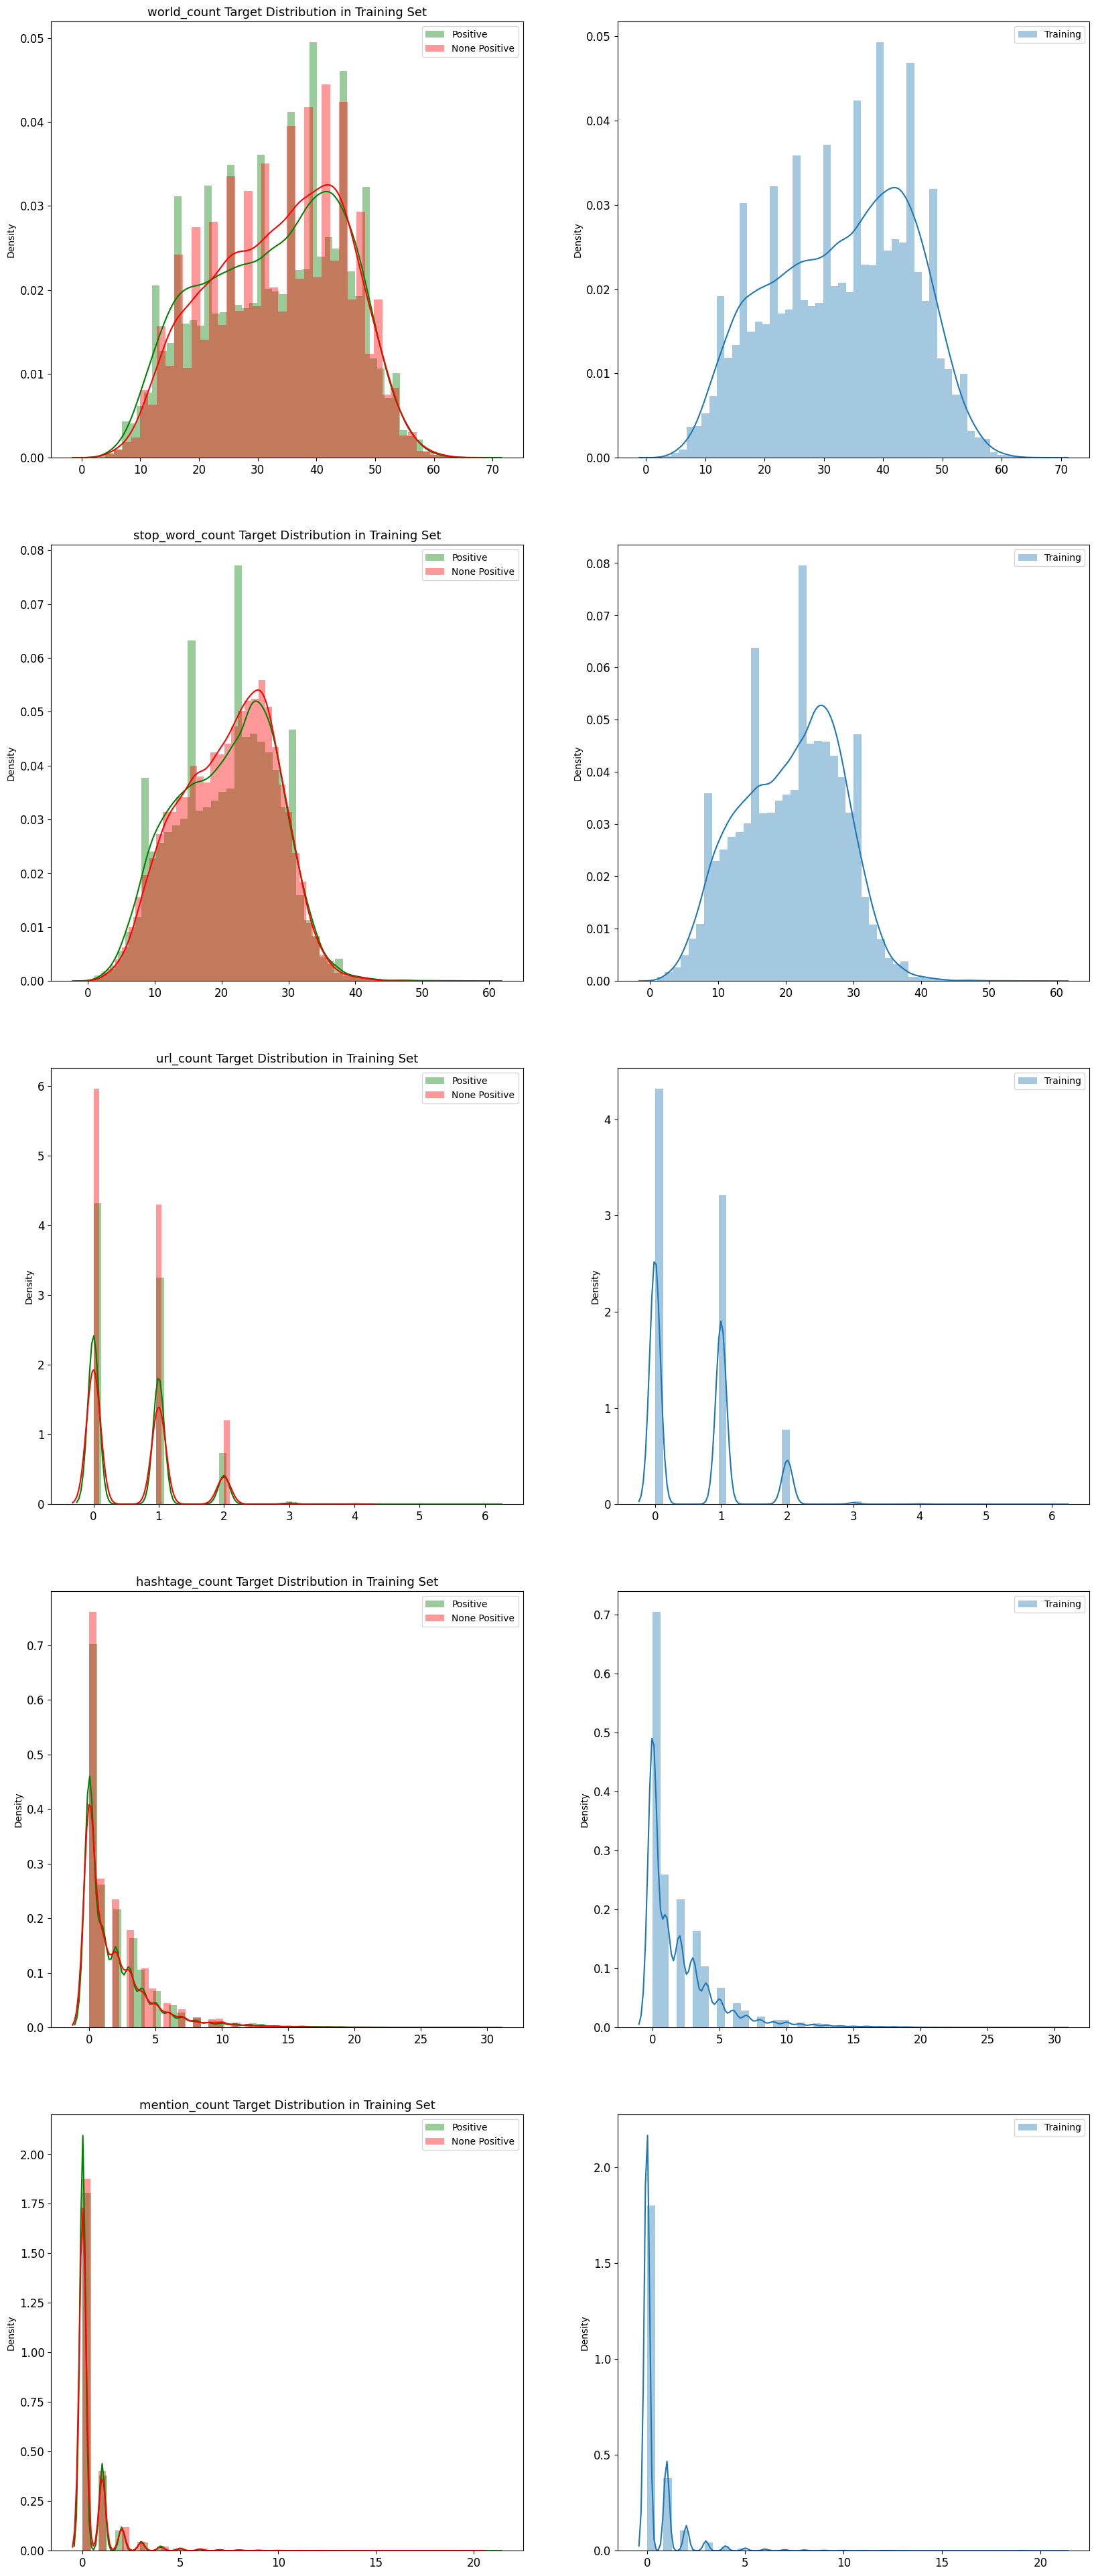

In [90]:
METAFEATURES=['world_count','stop_word_count','url_count','hashtage_count','mention_count']
POSITIVE=df['Sentiment']=='Positive'
fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sn.distplot(df.loc[~POSITIVE][feature], label='Positive', ax=axes[i][0], color='green')
    sn.distplot(df.loc[POSITIVE][feature], label='None Positive', ax=axes[i][0], color='red')

    sn.distplot(df[feature], label='Training', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)


In [ ]:
fig.savefig('fig_2.png')

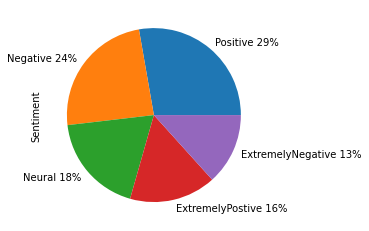

In [53]:
df.groupby('NomericSentiment').count()['Sentiment'].plot(kind='pie',labels=['Positive 29%','Negative 24%','Neural 18%','ExtremelyPostive 16%','ExtremelyNegative 13%'])

# Cleanig  Data
After we take a look on the data now we can write some function for cleaning step

In [ ]:
def replace_urls(text):
        """
    This Function replace url in the text
    
    parameter:
            text : is string 
    return : string
    """
    url_regex = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(url_regex, " ", text)
    return text


In [92]:
def normalize_whitespace(text):
      """
    This function normalizes whitespaces, removing duplicates.
    
    parameter:
            text : is string
    return : string
    """
    text = re.sub(r"//t",r" ", text)
    text = re.sub(r"( )\1+",r"\1", text)
    text = re.sub(r"(\n)\1+",r"\1", text)
    text = re.sub(r"(\r)\1+",r"\1", text)
    text = re.sub(r"(\t)\1+",r"\1", text)
    return text.strip(" ")


In [93]:
print(df['OriginalTweet'][0])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8


In [94]:
replace_urls(df['OriginalTweet'][5])

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports  '

In [95]:
def clean(tweet):
        """
    This Function is The main Function For cleaning 
    we only used regular expretion 
    
    parameter : 
            tweet : is string
    return : clean string
    """

    #remove url
    tweet=replace_urls(tweet)

    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"â\x94", "" , tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
        
    # Words with punctuations and special characters
    # punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    # for p in punctuations:
    #     tweet = tweet.replace(p, f' {p} ')
        
    # # ... and ..
    tweet = tweet.replace('...', ' ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ')      

    #remove mention
    tweet=re.sub(r'@\w+','',tweet)

    #remove dupicalte whitespace
    tweet=normalize_whitespace(tweet)

    return tweet.lower()

In [96]:
df['clean_text']=df['OriginalTweet'].apply(clean)

In [97]:
df['clean_text'].head()

0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
3    my food stock is not the only one which is emp...
4    me, ready to go at supermarket during the #cov...
Name: clean_text, dtype: object

In [108]:
df.to_csv('/content/drive/MyDrive/clean_data.csv',index=False)

# Text Analysis 
 we can see that  i do some Text analysis in the first and that what we should do
 to know how to clean data
 put for sake of Home work i do what you wont me do

**First i well make all tweet as one Text and work with the wall data**

In [62]:
clean_text=""
for data in df['clean_text']:
  clean_text+=data
un_clean_text=""
for data in df['OriginalTweet']:
  un_clean_text+=data

In [63]:
len(clean_text),len(un_clean_text)

(7557970, 8404266)

In [64]:
clean_freq=nltk.FreqDist(clean_text.split())
un_clean_freq=nltk.FreqDist(un_clean_text.split())

In [65]:
print(clean_freq.most_common(10))
print('________________\n')
print(un_clean_freq.most_common(10))

[('the', 42803), ('to', 37921), ('and', 23714), ('of', 21376), ('a', 18633), ('in', 18342), ('is', 13752), ('for', 13739), ('are', 11981), ('#coronavirus', 11090)]
________________

[('the', 40245), ('to', 37244), ('and', 23032), ('of', 21181), ('a', 17897), ('in', 17617), ('for', 13263), ('is', 11541), ('are', 10771), ('#coronavirus', 10197)]


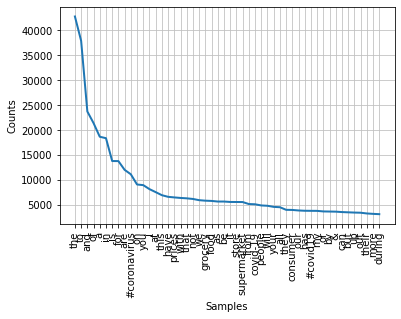

In [66]:
clean_freq.plot(50)

In [67]:
print(clean_freq.hapaxes()[:30])
print("_____________\n")
print(un_clean_freq.hapaxes()[:30])

['andadvice', 'poss', 'ordercoronavirus', 'australia:', '#confinementgeneralme,', 'litteraly', '#coronavirusfrance', '#confinementas', 'reportscashier', 'civics', 'about".was', '#rebel', 'understanding!for', 'prevention,we', '19?.', '#govindia', '#indiafightscoronaall', '#manila', '#philippinesdue', 'time.#horningsea', 'has.me:', 'amazon:adara', 'brands:', 'trendslines', 'alternative?', '#covid19?????', '#???_????????', '?16mar20', '"observed"', 'groceries,â\x94']
_____________

['@MeNyrbie', '@Phil_Gahan', 'https://t.co/iFz9FAn2Pa', 'https://t.co/xX6ghGFzCC', 'https://t.co/I2NlzdxNo8advice', 'poss', 'orderCoronavirus', 'Australia:', 'https://t.co/bInCA9Vp8PMy', '#ConfinementGeneral', 'https://t.co/zrlG0Z520jMe,', 'litteraly', '#CoronavirusFrance', 'https://t.co/usmuaLq72nAs', '@Tim_Dodson', 'https://t.co/cfXch7a2lUCashier', 'Civics', 'about".', 'https://t.co/ieFDNeHgDOWas', '#Rebel', 'https://t.co/eVXkQLIdAZDue', 'https://t.co/kw91zJ5O5iFor', 'prevention,we', '19?.', '#govindia', '#In

 we can see the word most comman is stop words and  
 as we mention befor we cant delet them
 in the other side we can see the cleaning operation do alot of work
 the less comman word change alot after cleaning 

In [69]:
from nltk.collocations import BigramCollocationFinder,BigramAssocMeasures,TrigramCollocationFinder,TrigramAssocMeasures

In [70]:
bigram_collocation=BigramCollocationFinder.from_words(clean_text.split())

In [71]:
bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio,20)

[('grocery', 'store'),
 ('covid', '19'),
 ('hand', 'sanitizer'),
 ('due', 'to'),
 ('toilet', 'paper'),
 ('online', 'shopping'),
 ('do', 'not'),
 ('panic', 'buying'),
 ('i', 'am'),
 ('the', 'grocery'),
 ('in', 'the'),
 ('will', 'be'),
 ('if', 'you'),
 ('social', 'distancing'),
 ('it', 'is'),
 ('going', 'to'),
 ('oil', 'prices'),
 ('don', 't'),
 ('#coronavirus', '#covid19'),
 ('have', 'been')]

 we can see some intersting thing in the bigram 
 word like oil price which is one of the most business afected by the pandemic

### for finding the most comman Hashtage 

In [74]:
dic={}
for w in clean_text.split():
  if '#' in w:
    if w in dic:
      dic[w]+=1
    else:
      dic[w]=1

In [75]:
len(dic) # we have 27433 

27433

In [77]:
sort_dic={k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}

In [6]:
def return_most_common_tag(dic,n=10):
    """
    This Function return the first n item in dictionary.
    parameter :
        dic : is the dictionay
        n : is number of items to return 
    return :
        three list items,keys ,values 
    """

    l=[]
    keys=[]
    values=[]
    for key,item in dic.items():
        l.append((key,item))
        keys.append(key)
        values.append(item)
        if len(l)==n:
            return (l,keys,values)

In [79]:
l,keys,values=return_most_common_tag(sort_dic,30)
l

[('#coronavirus', 11090),
 ('#covid19', 3744),
 ('#covid_19', 2119),
 ('#toiletpaper', 1269),
 ('#covid2019', 1049),
 ('#covid?19', 669),
 ('#socialdistancing', 669),
 ('#coronacrisis', 428),
 ('#pandemic', 376),
 ('#corona', 361),
 ('#stayhome', 358),
 ('#coronavirusoutbreak', 356),
 ('#coronaviruspandemic', 345),
 ('#coronavirus.', 342),
 ('#covid', 333),
 ('#retail', 318),
 ('#lockdown', 308),
 ('#quarantine', 301),
 ('#supermarket', 301),
 ('#stayathome', 292),
 ('#covid-19', 282),
 ('#food', 256),
 ('#panicbuying', 246),
 ('#coronavirusupdate', 243),
 ('#stophoarding', 237),
 ('#shopping', 210),
 ('#sanitizer', 203),
 ('#covid19uk', 197),
 ('#stayhomesavelives', 195),
 ('#staysafe', 193)]

(array([27.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  193. ,  1282.7,  2372.4,  3462.1,  4551.8,  5641.5,  6731.2,
         7820.9,  8910.6, 10000.3, 11090. ]),
 <a list of 10 Patch objects>)

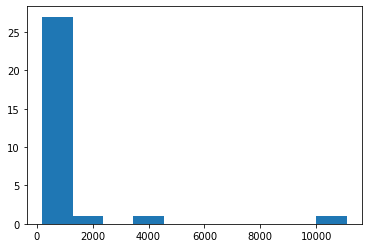

In [80]:
plt.hist(values)

In [81]:
sort_dic

{'#coronavirus': 11090,
 '#covid19': 3744,
 '#covid_19': 2119,
 '#toiletpaper': 1269,
 '#covid2019': 1049,
 '#covid?19': 669,
 '#socialdistancing': 669,
 '#coronacrisis': 428,
 '#pandemic': 376,
 '#corona': 361,
 '#stayhome': 358,
 '#coronavirusoutbreak': 356,
 '#coronaviruspandemic': 345,
 '#coronavirus.': 342,
 '#covid': 333,
 '#retail': 318,
 '#lockdown': 308,
 '#quarantine': 301,
 '#supermarket': 301,
 '#stayathome': 292,
 '#covid-19': 282,
 '#food': 256,
 '#panicbuying': 246,
 '#coronavirusupdate': 243,
 '#stophoarding': 237,
 '#shopping': 210,
 '#sanitizer': 203,
 '#covid19uk': 197,
 '#stayhomesavelives': 195,
 '#staysafe': 193,
 '#coronavirus,': 192,
 '#consumer': 184,
 '#oil': 180,
 '#handsanitizer': 177,
 '#coronavirusthe': 164,
 '#grocery': 158,
 '#stoppanicbuying': 157,
 '#quarantinelife': 156,
 '#coronavirusi': 156,
 '#toiletpapercrisis': 138,
 '#ecommerce': 137,
 '#coronavirusuk': 135,
 '#toiletpaperpanic': 133,
 '#virus': 131,
 '#economy': 115,
 '#china': 106,
 '#coronavi

the first thing we going to do is split the data for traing ,test ,validate 

 becouse the data is skew we should split in way that make the traning example have equial class as possiple

 the sklearn have function can do that 

In [2]:
import  sklearn.model_selection as model_selection

In [110]:
df=pd.read_csv('/content/drive/MyDrive/clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41141 entries, 0 to 41140
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UserName          41141 non-null  int64  
 1   ScreenName        41141 non-null  int64  
 2   TweetAt           41141 non-null  object 
 3   OriginalTweet     41141 non-null  object 
 4   Sentiment         41141 non-null  object 
 5   NomericSentiment  41141 non-null  float64
 6   world_count       41141 non-null  float64
 7   stop_word_count   41141 non-null  int64  
 8   url_count         41141 non-null  int64  
 9   hashtage_count    41141 non-null  float64
 10  mention_count     41141 non-null  float64
 11  clean_text        41141 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 3.8+ MB


In [111]:
train,test=model_selection.train_test_split(df,test_size=0.2,stratify=df['NomericSentiment'],random_state=42)
# the stratify parameter is tell the function to split the data according to this column so 
# the train and test set have the same distribution.

In [112]:
train['NomericSentiment'].value_counts()/len(train)

0.0    0.277589
1.0    0.241037
2.0    0.187135
3.0    0.161005
4.0    0.133234
Name: NomericSentiment, dtype: float64

In [113]:
test['NomericSentiment'].value_counts()/len(test)

0.0    0.277677
1.0    0.240977
2.0    0.187143
3.0    0.161016
4.0    0.133188
Name: NomericSentiment, dtype: float64

now after we split the data into train and test we can save this two data frame 
and then we can use this two data frame 

In [114]:
train.columns

Index(['UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', 'Sentiment',
       'NomericSentiment', 'world_count', 'stop_word_count', 'url_count',
       'hashtage_count', 'mention_count', 'clean_text'],
      dtype='object')

 ## important Note
 we can train on the meta data we create like the world count and url count and so on 
 but what should do is train on the tweet text so we will drop all the column except the clean text and Sentient 

In [115]:
train_df=train[['clean_text','Sentiment','NomericSentiment']]
test_df=test[['clean_text','Sentiment','NomericSentiment']]

In [117]:
train_df.to_csv('/content/drive/MyDrive/train_df.csv',index=False)
test_df.to_csv('/content/drive/MyDrive/test_df.csv',index=False)

In [2]:
train_df=pd.read_csv('/content/drive/MyDrive/train_df.csv')
test_df=pd.read_csv('/content/drive/MyDrive/test_df.csv')
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32912 entries, 0 to 32911
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clean_text        32912 non-null  object 
 1   Sentiment         32912 non-null  object 
 2   NomericSentiment  32912 non-null  float64
dtypes: float64(1), object(2)
memory usage: 771.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clean_text        8229 non-null   object 
 1   Sentiment         8229 non-null   object 
 2   NomericSentiment  8229 non-null   float64
dtypes: float64(1), object(2)
memory usage: 193.0+ KB


(None, None)

 now we will not toch the test data until we finish the train

In [3]:
X_train=train_df['clean_text'].values
y_train=train_df['NomericSentiment'].values
X_test=test_df['clean_text'].values
y_test=test_df['NomericSentiment'].values

 we will not make the validation data unitl do the deep learning part so
 first we do some machine learning stuff

In [3]:
import sklearn.linear_model as linear_model
import sklearn.ensemble as Ensambel
import sklearn.metrics as mertics 
import sklearn.feature_extraction as feature_extraction

In [6]:
sgd_cl=linear_model.SGDClassifier()
random_cl=Ensambel.RandomForestClassifier()

In [145]:
vectorize=feature_extraction.text.CountVectorizer(lowercase=False)
vectorize.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [8]:
train_set=vectorize.transform(X_train)
test_set=vectorize.transform(X_test)

In [128]:
train_set

<32925x41787 sparse matrix of type '<class 'numpy.int64'>'
	with 854953 stored elements in Compressed Sparse Row format>

In [9]:
sgd_cl.fit(train_set,y_train)
score=sgd_cl.score(test_set,y_test)
print("Accuracy : {}".format( score * 100))

Accuracy : 57.856361647830845


In [10]:
sgd_cl.predict(test_set[:10]),y_test[:10]

(array([0., 2., 2., 1., 1., 1., 1., 1., 2., 1.]),
 array([2., 1., 2., 2., 4., 0., 2., 2., 2., 1.]))

 now lets try with Random Forest Classifier

In [12]:
random_cl.fit(train_set,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
random_score=random_cl.score(test_set,y_test)
print("Accuracy : {}".format( random_score * 100))

Accuracy : 50.18835824523028


**stocastic grediant discent** is better than **Random Forest Classifier** 

 now lets try with Deep Neural Network 

In [16]:
X_train_set,X_val,y_train_set,y_val=model_selection.train_test_split(train_set,y_train,test_size=0.2)

In [17]:
y_train_set_cat=keras.utils.to_categorical(y_train_set)
y_val_cat=keras.utils.to_categorical(y_val)

In [27]:
y_test_cat=keras.utils.to_categorical(y_test)

In [18]:
input_dim=X_train_set.shape[1]

In [29]:
keras.backend.clear_session()
model=keras.models.Sequential([
                               keras.layers.Dense(10,activation='relu',input_dim=input_dim),
                               keras.layers.Dropout(0.2),
                               keras.layers.Dense(5,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                418050    
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 418,105
Trainable params: 418,105
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [21]:
y_train_set_cat.shape,y_val_cat.shape

((26329, 5), (6583, 5))

In [22]:
X_train_set.shape,X_val.shape

((26329, 41804), (6583, 41804))

In [4]:
erlay_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
check=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/best_model.h5',monitor='val_loss',save_best_only=True)

In [32]:
history=model.fit(X_train_set,y_train_set_cat,epochs=100,batch_size=64,validation_data=(X_val,y_val_cat),callbacks=[erlay_stop,check])

Epoch 1/100
412/412 [==============================] - 1s 3ms/step - loss: 1.5595 - accuracy: 0.2873 - val_loss: 1.5327 - val_accuracy: 0.2982
Epoch 2/100
412/412 [==============================] - 1s 2ms/step - loss: 1.5082 - accuracy: 0.3299 - val_loss: 1.4965 - val_accuracy: 0.3404
Epoch 3/100
412/412 [==============================] - 1s 2ms/step - loss: 1.4736 - accuracy: 0.3619 - val_loss: 1.4657 - val_accuracy: 0.3652
Epoch 4/100
412/412 [==============================] - 1s 2ms/step - loss: 1.4413 - accuracy: 0.3762 - val_loss: 1.4362 - val_accuracy: 0.3763
Epoch 5/100
412/412 [==============================] - 1s 2ms/step - loss: 1.4122 - accuracy: 0.3928 - val_loss: 1.4068 - val_accuracy: 0.3796
Epoch 6/100
412/412 [==============================] - 1s 2ms/step - loss: 1.3830 - accuracy: 0.4069 - val_loss: 1.3807 - val_accuracy: 0.3992
Epoch 7/100
412/412 [==============================] - 1s 2ms/step - loss: 1.3538 - accuracy: 0.4261 - val_loss: 1.3536 - val_accuracy: 0.4212

In [33]:
model=keras.models.load_model('/content/drive/MyDrive/best_model.h5')

In [34]:
loss, accuracy = model.evaluate(X_train_set, y_train_set_cat, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_set, y_test_cat, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.8708
Testing Accuracy:  0.6668


 as we can see this model do better than the machin learning model but we still have overfit

In [5]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

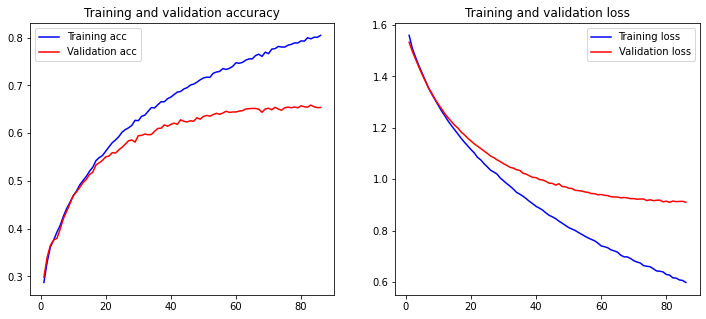

In [37]:
plot_history(history)

In [8]:
tokinizer=keras.preprocessing.text.Tokenizer(num_words=len(vectorize.vocabulary_))

In [9]:
tokinizer.fit_on_texts(X_train)

In [232]:
X_test[:5]

array(['how to avoid coronavirus phishing scams - consumer reports #covid-19 #coronavirus #coronavirus #coronavirusupdate #coronapocolypse',
       'harvey amp brockless now selling to the community in light of the covid 19 situation and the struggles seen at the supermarkets we re now selling dairy products cheese amp deli items at reduced prices avoid the crowds come and see for yourself 26 3 the timberdine pub worcester',
       'if youâ\x92re meaning masks to prevent *getting* #coronavirus the materials are very specific and not available to the average consumer :(',
       'in addition to our recent update on the â\x91force majeureâ\x92 possibilities relating to covid-19, it is important to consider the broader practical implications for commercial and consumer agreements. read here,',
       'i work in a supermarket and i am proud to have a job that will continue to provide a service throughout this crazy time. however, a customer admitted last night that he should be self isolat

In [10]:
X_train_set=tokinizer.texts_to_sequences(X_train)
X_test_set=tokinizer.texts_to_sequences(X_test)

In [146]:
vocab_size=len(tokinizer.word_index)+1
vocab_size

45822

In [13]:
maxlength=65
X_train_set=keras.preprocessing.sequence.pad_sequences(X_train_set,padding='post',maxlen=maxlength)
X_test_set=keras.preprocessing.sequence.pad_sequences(X_test_set,padding='post',maxlen=maxlength)
X_train_set[0,:]

array([ 184, 2353,  342,    1, 4139,    2,  116,   34,    1,   98,    1,
        635,   13,  261,  782,    2,    1,  985,   62,   44,   98,    2,
         54,   24,    1,   54,   15,   64,    7, 2028,  508,    2,  113,
        524,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [14]:
keras.backend.clear_session()
embading_dim=200
model_1=keras.models.Sequential([
                keras.layers.Embedding(input_dim=vocab_size,output_dim=embading_dim,input_length=maxlength,mask_zero=True),
                keras.layers.GlobalMaxPool1D(),
                keras.layers.Dense(32,activation='relu'),
                keras.layers.Dropout(0.2),
                keras.layers.Dense(10,activation='relu'),
                keras.layers.Dropout(0.2),
                keras.layers.Dense(5,activation='softmax')                 
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 200)           9164400   
_________________________________________________________________
global_max_pooling1d (Global (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5

In [15]:
model_1.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [33]:
model_checkpoint=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/best_model_3.h5',monitor='val_loss',save_best_only=True)

In [17]:
X_train_set,X_val,y_train_set,y_val=model_selection.train_test_split(X_train_set,y_train,test_size=0.2)

In [18]:
y_train_set.shape,X_train_set.shape

((26329,), (26329, 65))

In [19]:
y_train_set_cat=keras.utils.to_categorical(y_train_set)
y_val_cat=keras.utils.to_categorical(y_val)

In [20]:
history_2=model_1.fit(X_train_set,y_train_set_cat,epochs=100,validation_data=(X_val,y_val_cat),batch_size=64,callbacks=[model_checkpoint,erlay_stop])

Epoch 1/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5859 - accuracy: 0.2662 - val_loss: 1.5720 - val_accuracy: 0.2827
Epoch 2/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5781 - accuracy: 0.2747 - val_loss: 1.5681 - val_accuracy: 0.2827
Epoch 3/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5753 - accuracy: 0.2767 - val_loss: 1.5641 - val_accuracy: 0.2827
Epoch 4/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5729 - accuracy: 0.2761 - val_loss: 1.5614 - val_accuracy: 0.2827
Epoch 5/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5697 - accuracy: 0.2764 - val_loss: 1.5585 - val_accuracy: 0.2827
Epoch 6/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5674 - accuracy: 0.2765 - val_loss: 1.5559 - val_accuracy: 0.2827
Epoch 7/100
412/412 [==============================] - 3s 8ms/step - loss: 1.5638 - accuracy: 0.2779 - val_loss: 1.5515 - val_accuracy: 0.2827

In [21]:
model_1=keras.models.load_model('/content/drive/MyDrive/best_model_2.h5')

In [22]:
y_test_cat=keras.utils.to_categorical(y_test)

Training Accuracy: 0.8637
Testing Accuracy:  0.6946


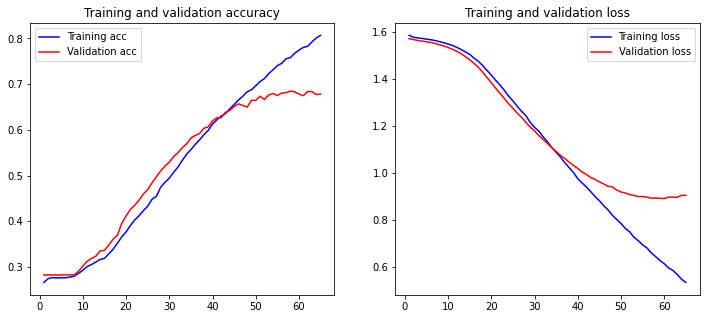

In [25]:
loss, accuracy = model_1.evaluate(X_train_set, y_train_set_cat, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_1.evaluate(X_test_set, y_test_cat, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_2)

we get better result with this model but we can do better

before we use **LSTM** the best choice for sequnce model we will use pre training embading model

In [28]:
! wget http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip

--2020-12-16 14:38:56--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  1.90MB/s    in 16m 56s 

2020-12-16 14:55:52 (2.04 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]



In [22]:
!unzip -q /content/drive/MyDrive/glove.6B.zip

In [6]:
embading_index={}
path = '/content/glove.6B.300d.txt'
with open(path) as f:
  for line in f:
    key,value=line.split(maxsplit=1)
    value=np.fromstring(value,"f",sep=" ")
    embading_index[key]=value

print("Found {} word vector".format(len(embading_index)))

Found 400000 word vector


In [26]:
tokinizer.word_index

{'the': 1,
 'to': 2,
 '\r': 3,
 'and': 4,
 'of': 5,
 'in': 6,
 'a': 7,
 'coronavirus': 8,
 '19': 9,
 'covid': 10,
 'is': 11,
 'for': 12,
 'are': 13,
 'i': 14,
 'you': 15,
 'on': 16,
 'this': 17,
 'prices': 18,
 'at': 19,
 'food': 20,
 'supermarket': 21,
 'store': 22,
 'have': 23,
 'with': 24,
 'it': 25,
 'we': 26,
 'not': 27,
 'that': 28,
 'grocery': 29,
 'as': 30,
 'be': 31,
 'people': 32,
 'from': 33,
 'all': 34,
 'will': 35,
 'covid19': 36,
 'consumer': 37,
 'your': 38,
 'my': 39,
 'they': 40,
 'our': 41,
 'up': 42,
 'out': 43,
 'has': 44,
 'can': 45,
 'by': 46,
 'or': 47,
 'more': 48,
 'but': 49,
 'shopping': 50,
 'if': 51,
 'online': 52,
 'how': 53,
 'do': 54,
 'their': 55,
 'during': 56,
 'so': 57,
 'pandemic': 58,
 'now': 59,
 'no': 60,
 'get': 61,
 'what': 62,
 'about': 63,
 'need': 64,
 'who': 65,
 'just': 66,
 'panic': 67,
 'workers': 68,
 'us': 69,
 'like': 70,
 'sanitizer': 71,
 'time': 72,
 'was': 73,
 'an': 74,
 'when': 75,
 'demand': 76,
 'home': 77,
 'there': 78,
 'go':

In [14]:
embading_dim=300
num_tokens=vocab_size
hit=0
miss=0

embading_matrix=np.zeros((num_tokens,embading_dim))

for word,value in tokinizer.word_index.items():
  embading_vector=embading_index.get(word)
  if embading_vector is not None:
      embading_matrix[value]=embading_vector
      hit+=1
  else:miss+=1
print(hit,miss)

27024 18797


In [39]:
keras.backend.clear_session()

model_3=keras.models.Sequential([
                keras.layers.Embedding(input_dim=num_tokens,output_dim=embading_dim,embeddings_initializer=keras.initializers.Constant(embading_matrix),trainable=True,input_length=70,mask_zero=True),
                keras.layers.MaxPooling1D(),
                keras.layers.Conv1D(128, 5, activation="relu"),
                keras.layers.MaxPooling1D(),
                keras.layers.Conv1D(128, 5, activation="relu"),
                keras.layers.MaxPooling1D(),
                keras.layers.Conv1D(128, 5, activation="relu"),
                keras.layers.GlobalMaxPooling1D(),
                keras.layers.Dense(128, activation="relu"),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(5, activation="softmax"),
])
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 300)           13746600  
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 35, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 31, 128)           192128    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 128)           82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 128)            8

In [42]:
model_3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [31]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [43]:
with tf.device("/device:GPU:0"):
  history_3=model_3.fit(X_train_set,y_train,epochs=100,validation_data=(X_val_set,y_val),batch_size=64,callbacks=[erlay_stop,model_checkpoint])

Epoch 1/100
412/412 [==============================] - 24s 58ms/step - loss: 1.4495 - accuracy: 0.3493 - val_loss: 1.2360 - val_accuracy: 0.4671
Epoch 2/100
412/412 [==============================] - 34s 82ms/step - loss: 1.1135 - accuracy: 0.5387 - val_loss: 1.0388 - val_accuracy: 0.5753
Epoch 3/100
412/412 [==============================] - 40s 97ms/step - loss: 0.8760 - accuracy: 0.6611 - val_loss: 0.9440 - val_accuracy: 0.6309
Epoch 4/100
412/412 [==============================] - 37s 90ms/step - loss: 0.7088 - accuracy: 0.7401 - val_loss: 0.9406 - val_accuracy: 0.6334
Epoch 5/100
412/412 [==============================] - 27s 66ms/step - loss: 0.5726 - accuracy: 0.7999 - val_loss: 0.9618 - val_accuracy: 0.6667
Epoch 6/100
412/412 [==============================] - 27s 65ms/step - loss: 0.4655 - accuracy: 0.8419 - val_loss: 0.9979 - val_accuracy: 0.6845
Epoch 7/100
412/412 [==============================] - 27s 64ms/step - loss: 0.3747 - accuracy: 0.8743 - val_loss: 1.3870 - val_ac

In [44]:
model_2=keras.models.load_model('/content/drive/MyDrive/best_model_3.h5')

Training Accuracy: 0.7579
Testing Accuracy:  0.6480


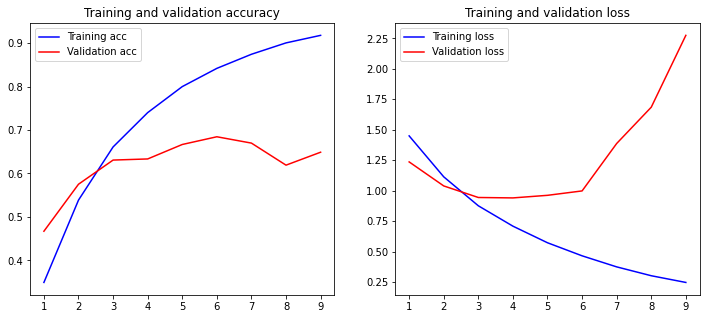

In [45]:
loss, accuracy = model_2.evaluate(X_train_set, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_2.evaluate(X_test_set, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history_3)

now we going to use Rnn to solve this problem 

I cant continue in the same Notebook so There is some Notebook that I use for training alot of model

please read **README** file if you didn't